In [1]:
# Concordance difference heatmaps

In [2]:
!pwd
!date

/allen/aics/assay-dev/MicroscopyOtherData/Viana/projects/cvapipe_analysis/local_staging_notebooks/FigureEdgesExt
Tue Jun 28 22:13:25 PDT 2022


In [3]:
import os
import sys
import importlib
import concurrent
import numpy as np
import pandas as pd
from pathlib import Path
from tqdm.notebook import tqdm
from skimage import io as skio
import matplotlib.pyplot as plt
from aicscytoparam import cytoparam
from sklearn.decomposition import PCA
from aicsshparam import shtools, shparam
from aicsimageio import AICSImage
from aicsimageio.writers import OmeTiffWriter
from cvapipe_analysis.tools import io, viz, general, controller, shapespace, plotting

sys.path.insert(1, '../tools')
import common

In [4]:
# Controller form cvapipe_analysis
path_config = Path("/allen/aics/assay-dev/MicroscopyOtherData/Viana/projects/cvapipe_analysis/")
config = general.load_config_file(path_config)
control = controller.Controller(config)
device = io.LocalStagingIO(control)
print(control.get_staging())

/allen/aics/assay-dev/MicroscopyOtherData/Viana/projects/cvapipe_analysis/local_staging_variance


In [5]:
dsname = "edges"
path_cvapipe = Path(control.get_staging()).parent
datasets = {
    dsname: {
        "control": f"{path_cvapipe}/local_staging_variance_edges",
        "perturbed": f"{path_cvapipe}/local_staging_edge_cells_midpoint_expanded"
    }}

In [6]:
def get_corr_matrix(mode, staging):
    # Matched datasets have a single shape mode and single bin
    df = pd.read_csv(f"{staging}/concordance/plots/avg-STR-NUC_MEM_PC1-1_{mode}.csv", index_col=0)
    return df

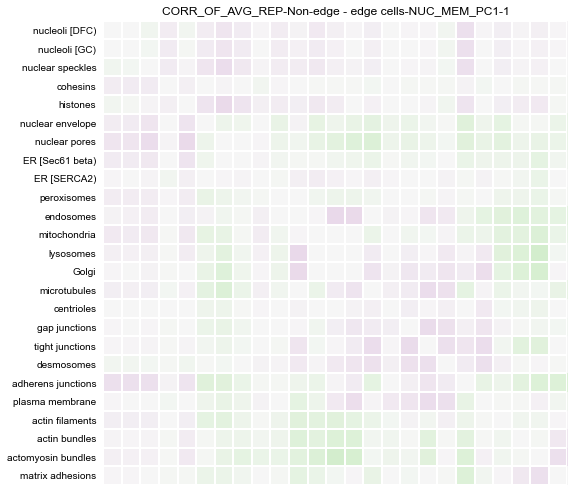

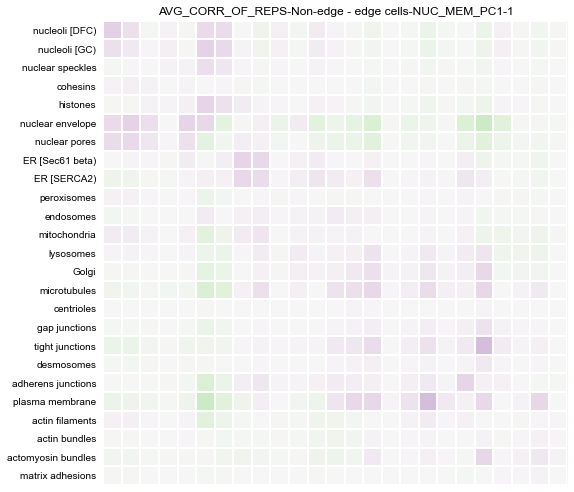

In [12]:
for mode in ["CORR_OF_AVG_REP", "AVG_CORR_OF_REPS"]:
    corr_ct = get_corr_matrix(mode, f"{datasets[dsname]['control']}")
    corr_pt = get_corr_matrix(mode, f"{datasets[dsname]['perturbed']}")

    pd.DataFrame(corr_ct).to_csv(f"{mode}_edge_ct.csv", index=False, header=False, sep="\t")
    pd.DataFrame(corr_pt).to_csv(f"{mode}_edge_pt.csv", index=False, header=False, sep="\t")
    
    data = corr_ct.values - corr_pt.values
    df = pd.DataFrame(data, columns=corr_ct.columns, index=corr_ct.index)
    
    ploter = plotting.ConcordancePlotMaker(control)
    if mode == "AVG_CORR_OF_REPS":
        ploter.set_heatmap_min_max_values(-0.1, 0.1)
    ploter.set_row(pd.Series({"alias": "Non-edge - edge cells","aggtype": mode, "shape_mode": "NUC_MEM_PC1", "mpId": 1}))
    ploter.make_heatmap(df.values, display=True, cmap="PRGn")
    
    ploter.figs[0][0].savefig(f"FigureEdgesExt4_diff_{mode}.pdf")

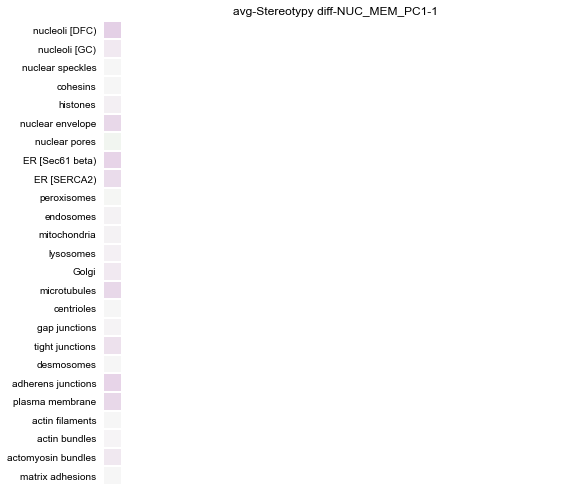

In [8]:
ploter = plotting.ConcordancePlotMaker(control)
ploter.set_heatmap_min_max_values(-0.1, 0.1)
ploter.set_row(pd.Series({"alias": f"Stereotypy diff","aggtype": "avg", "shape_mode": "NUC_MEM_PC1", "mpId": 1}))
ploter.make_heatmap(np.diag(df.values).reshape(-1,1), display=True, cmap="PRGn")
ploter.figs[0][0].savefig(f"FigureEdgesExt4_stereotypy_diff.pdf")

In [9]:
common.now("complete")

complete 2022-06-28 22:13:30
